#  Задача проекта.


**Для анализа поступили данные сервиса Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Задача — установить параметры для определения рыночной стоимости объектов недвижимости . Это позволит построить автоматизированную систему для отслеживания аномалиЙ и мошеннической деятельности.
По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.**
<div class="alert alert-info">
    Предстоит рассмотреть данные, провести предобработку, добавить дополнительные расчетные данные. Следующим этапом следует очистить данные от выбросов и аномальных(ошибочных) значений. После этого проанализировать полученные  результаты, сравнить показатели по Санкт-Петербургу и соседним населённым пунктам используя приёмы визуализации. В итоге предстоит сделать выводы и определить основные параметры для определения средней цены объектов недвижимости в регионе.
</div>

## Знакомство с данными

In [159]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
 # сохраним таблицу в переменной data
data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv')

In [160]:
 # вывод первых 5 строк и заголовков
display(data.head())

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


### Обработка исходного файла.

Названия колонок склеены.Следует обработать разделители в данных чтобы таблица была читаема.

In [161]:
# в качестве разделителя укажем sep='\t'
data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv',sep='\t') 


In [162]:
# для вывода всех колонок
pd.set_option('display.max_columns', None) 
# вывод первых 5 строк и заголовков
display(data.head()) 


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [163]:
# общая информация о файле
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

# Предобработка данных.

## Переименование колонок .

Название колонки *'cityCenters_nearest'* пересохраним в змеином регистре *'city_centers_nearest'* с помощью метода rename().

In [164]:
# переименуем столбец 'cityCenters_nearest'
data = data.rename(columns={'cityCenters_nearest' : 'city_centers_nearest'}) 
# выведем на экран первые 5 строк data
display(data.head()) 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


* Результат- название колонки приведено 'city_centers_nearest к общему виду.

## Обработка пропущенных значений.

### Обработка пропусков в 'ceiling_height'.

In [165]:
#  вывод для анализа первых 10 строк колонки 'ceiling_height'
print(data['ceiling_height'].head(10)) 
# найдём среднее значение 'ceiling_height'
print(data['ceiling_height'].mean()) 
# найдем медиану 'ceiling_height'
print(data['ceiling_height'].median()) 

0    2.70
1     NaN
2     NaN
3     NaN
4    3.03
5     NaN
6     NaN
7     NaN
8     NaN
9    2.50
Name: ceiling_height, dtype: float64
2.77149889685604
2.65


для обработки пропущенных значений в 'ceiling_height'  для анализа заменим пропуски медианным значением, исходя из того что если высоту не указали, значит она не является какой-то исключительной.

In [166]:
#заменим пропуски медианным значением 
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
# вывод для анализа первых 10 строк колонки 'ceiling_height' - значения заменены
print(data['ceiling_height'].head(10)) 

0    2.70
1    2.65
2    2.65
3    2.65
4    3.03
5    2.65
6    2.65
7    2.65
8    2.65
9    2.50
Name: ceiling_height, dtype: float64


* Результат: пропуски в колонке 'ceiling_height' заменены на медианное значение.

### Обработка пропусков в колонке 'floors_total'.

In [167]:
 #  вывод для анализа значений'floors_total'
display(data['floors_total'].value_counts())


5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
10.0    1174
25.0    1075
6.0      914
17.0     833
3.0      668
7.0      592
14.0     553
18.0     505
24.0     469
8.0      390
2.0      383
15.0     365
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     203
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
37.0       1
34.0       1
33.0       1
60.0       1
29.0       1
52.0       1
Name: floors_total, dtype: int64


Анализ показал, что большинство (5788+3761)/23699%=40,29% квартир этажностью 5 и 9 этажей. Доля  объявлений по квартирам в домах выше 27 этажей менее 10 %.

In [168]:
# выведем уникальные значения колонки 'floors_total'
display(data['floors_total'].unique())

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

доля пропущенных значений ничтожно мала,заменим nan  на 1

In [169]:
# заменим пропуски на 1
data['floors_total'] = data['floors_total'].fillna(1) 

In [170]:
# контроль изменений
display(data['floors_total'].unique()) 

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15.,  1., 20.,
       28., 36., 21., 35., 34., 60., 29., 33., 52., 37.])

In [171]:
# поменять тип данных колонки 'floors_total' с float на int
data['floors_total'] = data['floors_total'].astype('int') 
# контроль изменений
display(data['floors_total'].unique()) 

array([16, 11,  5, 14, 12, 26, 24, 27,  9,  6, 17, 25,  3, 23, 19, 18,  4,
       22,  8,  2, 10,  7, 13, 15,  1, 20, 28, 36, 21, 35, 34, 60, 29, 33,
       52, 37])

* Результат :

значения  NaN заменены на 1. 

тип данных колонки 'floors_total'изменён с float на int , что соответствует типу показателя.

###  Обработка пропусков в колонке 'living_area'.

In [172]:
# вывод для анализа значений 'living_area'
print(data['living_area'].value_counts()) 

18.00    882
17.00    675
30.00    598
16.00    486
20.00    481
        ... 
96.40      1
50.26      1
43.81      1
54.43      1
16.74      1
Name: living_area, Length: 1782, dtype: int64


In [173]:
# выведем для анализа строки с пропусками в колонке 'living_area'
display(data[data['living_area'].isna()].head()) 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,2.65,24,NaN,22,NaN,False,False,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
30,12,2200000.0,32.8,2018-02-19T00:00:00,1,2.65,9,NaN,2,NaN,False,False,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.50,5,NaN,1,NaN,False,False,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,2.65,22,NaN,3,NaN,False,False,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN


In [174]:
# медианное значение отношения жилой площади к общей
print((data['living_area']/data['total_area']).median()) 

0.5678598992678503


Заменим отсутствующие значения в колонке 'living_area' на расчетные:('total_area' * 0.57). Для этого сделаем несколько подготовительных преобразований.

In [175]:
# создадим временную переменную living_area_middl для операций
living_area_middl = data[['total_area','living_area']] #

# заменим пропуски на медианное значение отношения жилой площади к общей 0.57
living_area_middl_1 = living_area_middl['living_area'].fillna(0.57)

# создадим столбец-выборку living_area_middl_2 со значениями 0,57 
living_area_middl_2 = living_area_middl_1.loc[living_area_middl_1==0.57]

# перемножим столбец-выборку на столбец 'total_area'.
# Получили столбец с коэффициентами для пропущенных значений исхолного 'living_area'
total_area_koef = (living_area_middl['total_area']*living_area_middl_2).fillna(1)

# умножим столбец с коэффициентами на исходный с заменой пропусков на 1
living_area_new = total_area_koef*(living_area_middl['living_area'].fillna(1))

# пересохраним исправленный 'living_area' в data
data['living_area']= living_area_new 
# контроль изменений-пропусков в 'living_area' нет
data.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  int64  
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

* Результат: 

пропуски в 'living_area' заменены на произведение 'total_area' на медианный к-нт отношения жилой площади к общей 0,57

### Обработка пропусков в колонке 'is_apartment'.

In [176]:
# знакомство со списком значений
print(data['is_apartment'].value_counts())

False    2725
True       50
Name: is_apartment, dtype: int64


'is_apartment'- булев тип-11,71%, но в основном пропуски. Поскольку признак True только в 50 объявлениях (50/2725%=1,8%), то предполагаю, что пропуски следует отнести к значению False как к наибольшему из указанных в объявлениях.

In [177]:
# выведем первые 5 строк на экран
display(data.query('is_apartment==True').head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
543,11,12790000.0,56.6,2018-11-06T00:00:00,2,3.50,3,29.400,1,True,False,False,NaN,NaN,Петергоф,35248.0,30437.0,3.0,53.0,3.0,22.0,NaN
916,11,8183000.0,70.0,2018-01-11T00:00:00,2,3.12,3,40.000,3,True,False,False,NaN,2.0,Санкт-Петербург,45796.0,21729.0,0.0,NaN,1.0,754.0,179.0
1109,1,34878556.0,95.8,2014-12-09T00:00:00,2,2.65,6,58.300,5,True,False,False,20.0,1.0,Санкт-Петербург,21860.0,318.0,2.0,160.0,3.0,569.0,1572.0
1608,12,2150000.0,20.1,2019-01-30T00:00:00,1,2.65,9,11.457,1,True,False,False,NaN,NaN,Санкт-Петербург,26646.0,12147.0,0.0,NaN,0.0,NaN,13.0
2759,11,7500000.0,152.0,2018-07-27T00:00:00,3,3.00,3,86.640,1,True,False,False,NaN,1.0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,7.0


In [178]:
# заменим пропуски на False
data['is_apartment'] = data['is_apartment'].fillna(False) 

In [179]:
# контроль изменений
print(data['is_apartment'].value_counts()) 

False    23649
True        50
Name: is_apartment, dtype: int64


In [180]:
# изменим тип данных на 'bool'
data['is_apartment'].astype('bool') 
# контроль изменений
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  int64  
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

* Результат:

пропущенные значения в колонке 'is_apartment' заменены на False. Тип колонки приведён в соответствие с показателем, переведён из int64 в bool.


### Обработка пропусков в колонке 'kitchen_area'.

In [181]:
# знакомство со списком значений колонки 'kitchen_area' для анализа
display(data[data['kitchen_area'].isna()].head()) 
# знакомство со списком значений
print(data['kitchen_area'].max()) 
# знакомство со списком значений
print(data['kitchen_area'].min()) 
# знакомство со списком значений
print(data['kitchen_area'].median())


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14,90.630,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
30,12,2200000.0,32.8,2018-02-19T00:00:00,1,2.65,9,18.696,2,False,False,False,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.50,5,26.106,1,False,False,False,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,2.65,22,22.800,3,False,False,False,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
59,15,6300000.0,46.5,2017-03-06T00:00:00,1,2.65,13,26.505,13,False,False,False,NaN,NaN,Санкт-Петербург,11125.0,14501.0,0.0,NaN,0.0,NaN,336.0


112.0
1.3
9.1


<AxesSubplot:>

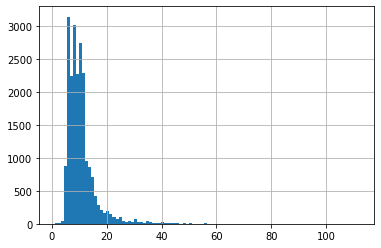

In [182]:
# построим гистограмму площади кухни
data['kitchen_area'].hist(range=(1,112),bins=100) 


 *  анализ данных колонки 'kitchen_area' показал, что пропуски в колонке есть в объявлениях о квартирах с разной площадью (предварительная версия состояла в том, что не указана площадь в квартирах-студиях или маленьких квартирах). Доля пропущеных значений менее 10% (21421-23699)/23699%=9,61%. Заменим пропуски медианным значением.

In [183]:
# заменим пропуски медианным значением колонки 'kitchen_area'
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median()) 
 # контроль изменений
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  int64  
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

* Результат:

Доля пропущеных значений менее 10% (21421-23699)/23699%=9,61%;
пропущенные значения колонки 'kitchen_area' заменены на медианное.

### Обработка пропусков в колонке 'balcony'.

In [184]:
# знакомство со списком значений колонки 'balcony' с пропусками для анализа
display(data[data['balcony'].isna()].head()) 
print(data['balcony'].max()) 
print(data['balcony'].min()) 
print(data['balcony'].median())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16,51.00,8,False,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14,32.00,13,False,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12,14.40,5,False,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27,15.43,26,False,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
10,5,5050000.0,39.60,2017-11-16T00:00:00,1,2.67,12,20.30,3,False,False,False,8.50,NaN,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0


5.0
0.0
1.0


* Информации о балконах нет в более 50% объявлениях. Поскольку других данных нет будем считать, что и балконов тоже нет, заменим пропуски на 0.

In [185]:
# заменим пропуски  в колонке 'balcony' на 0 и изменим тип данных на int
data['balcony'] = data['balcony'].fillna(0).astype('int') 
# контроль изменений
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  int64  
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  int64  
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

* Результат:

Информации о балконах нет в более 50% объявлениях.

Пропущенные значения в колонке 'balcony' заменены на 0.

### Обработка пропусков в колонке 'locality_name'.

In [186]:
# знакомство со списком значений колонки 'locality_name' с пропусками для анализа
display(data[data['locality_name'].isna()].head())


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,8600000.0,81.7,2016-04-15T00:00:00,3,3.55,5,50.8,2,False,False,False,8.8,0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
2033,6,5398000.0,80.0,2017-05-30T00:00:00,3,2.65,4,42.6,2,False,False,False,18.6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
2603,20,3351765.0,42.7,2015-09-20T00:00:00,1,2.65,24,15.6,3,False,False,False,10.7,0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
2632,2,5130593.0,62.4,2015-10-11T00:00:00,2,2.65,24,33.1,21,False,False,False,8.2,0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
3574,10,4200000.0,46.5,2016-05-28T00:00:00,2,2.65,5,30.8,5,False,False,False,6.5,0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0


* процент пропущенных значений в колонке locality_name составляет (23699-23650)%/23699=0,21% ничтожно мал. От этих пропусков без сожаления избавляемся. 

In [187]:
#удалим строки с пропусками в колонке 'locality_name'
data=data.dropna(subset = ['locality_name'])
# контроль изменений- строки удалены
data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        23650 non-null  float64
 6   floors_total          23650 non-null  int64  
 7   living_area           23650 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          23650 non-null  bool   
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          23650 non-null  float64
 13  balcony               23650 non-null  int64  
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

* Результат:

Доля пропущенных значений в колонке 'locality_name'] составляет (23699-23650)%/23699=0,21% ничтожно мал.

Пропуски в колонке 'locality_name' удалены.

### Обработка пропусков в колонках с расстоянием до значимых объектов.

In [188]:
# знакомство с данными  колонок с расстоянием до значимых объектов
display(data[['airports_nearest','city_centers_nearest','parks_around3000','parks_nearest','ponds_around3000','ponds_nearest']].head()) 

,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest
0,18863.0,16028.0,1.0,482.0,2.0,755.0
1,12817.0,18603.0,0.0,NaN,0.0,NaN
2,21741.0,13933.0,1.0,90.0,2.0,574.0
3,28098.0,6800.0,2.0,84.0,3.0,234.0
4,31856.0,8098.0,2.0,112.0,1.0,48.0


* Результат:

пропуски в колонках оставим без изменений, так как заменить их на другие значения возможности нет  .

data['airports_nearest'] = data['airports_nearest'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['parks_nearest'] = data['parks_nearest'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['ponds_nearest'] = data['ponds_nearest'].fillna(0)
 заменим пропуски  значением 0
data.info() # контроль изменений

### Обработка пропусков в колонке 'days_exposition'.

In [189]:
# знакомство с пропущенными значениями колонки 'days_exposition'
display(data[data['days_exposition'].isna()].head(10))
# max min значения в колонке
display(data['days_exposition'].max(),data['days_exposition'].min()) 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.000,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,2.65,24,40.812,22,False,False,False,18.9,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,2.65,22,22.800,3,False,False,False,9.1,1,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
45,17,5200000.0,50.6,2018-12-02T00:00:00,2,2.65,9,30.300,7,False,False,False,7.0,0,Санкт-Петербург,30011.0,12872.0,0.0,NaN,0.0,NaN,NaN
46,17,6600000.0,52.1,2019-01-31T00:00:00,2,2.60,24,29.700,9,False,False,False,8.3,2,Санкт-Петербург,15114.0,12702.0,0.0,NaN,0.0,NaN,NaN
49,1,3050000.0,30.8,2018-11-22T00:00:00,1,2.50,9,18.000,7,False,False,False,6.0,0,Санкт-Петербург,45341.0,16603.0,1.0,675.0,0.0,NaN,NaN
52,20,11795000.0,136.0,2017-09-22T00:00:00,6,3.00,2,94.000,2,False,False,False,11.0,1,Санкт-Петербург,16510.0,6582.0,1.0,526.0,0.0,NaN,NaN
71,20,4850000.0,57.5,2019-03-27T00:00:00,3,2.50,9,39.000,8,False,False,False,6.2,0,Санкт-Петербург,33623.0,12267.0,1.0,334.0,1.0,333.0,NaN
81,9,10949000.0,68.0,2018-12-27T00:00:00,1,2.65,10,38.760,6,False,False,False,9.1,0,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,11,2400000.0,43.9,2019-03-13T00:00:00,2,2.65,2,27.460,1,False,False,False,5.2,0,Кировск,NaN,NaN,NaN,NaN,NaN,NaN,NaN


1580.0

1.0

* Результат:

Пропуски в колонке  days_exposition оставляем, т.к. возможно эти квартиры ещё не проданы.


##### Вывод: пропуски отработаны. #####

# Добавляем данные: цена кв.м, день недели, месяц и год подачи объявления, тип этажа, соотношения площадей.

## Цена за кв.метр жилья в тыс.рублей.

In [190]:
# посчитаем и добавим в таблицу цену метра для удобства восприятия в тыс. руб.
data['metre_price'] = data['last_price']/(data['total_area']*1000) 
# посмотрим первые 5 значений
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,metre_price
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.00,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120.370370
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11,18.60,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82.920792
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5,34.30,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92.785714
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14,90.63,9,False,False,False,9.1,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408.176101
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.00,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100.000000


* Результат:

Колонка 'metre_price' добавлена в формате тыс.руб. для удобства восприятия.


## Дата публикаций: год, месяц и день недели.

In [191]:

# колонка 'weekday_exposition'-день недели публикации 
data['weekday_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).weekday 
# колонка 'month_exposition'- месяц публикации
data['month_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).month 
# колонка 'year_exposition' -год публикации
data['year_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).year 
# выведем на экран первые 5 строк
display(data.head())



,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,metre_price,weekday_exposition,month_exposition,year_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.00,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120.370370,3,3,2019
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11,18.60,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82.920792,1,12,2018
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5,34.30,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92.785714,3,8,2015
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14,90.63,9,False,False,False,9.1,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408.176101,4,7,2015
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.00,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100.000000,1,6,2018


* Результат:

Отдельные колонки для дня недели, месяца и года пкбликации добавлены. 


## Колонка 'floor_type'- тип этажа.

In [192]:
# выведем колонки с данными по этажам
data[['floor','floors_total']].head()

,floor,floors_total
0,8,16
1,1,11
2,4,5
3,9,14
4,13,14


In [193]:
# создадим функцию для определения типа этажа и добавим колонку с типом этажа в data
def floor_type_define(row): 
    floor = row['floor']
    floors_total = row['floors_total'] 
   
    if floor==1: 
        if floors_total>1: 
            return 'first_floor'  # категория - первый этаж 
    if floor==floors_total: 
        if floors_total> 1: 
            return 'last_floor'   # категория - последний этаж
    
    return 'another_floor'    # категория - другой этаж
# для проверки работы функции зададим переменные
row_values = [2, 7] 
row_columns = ['floor','floors_total']
row = pd.Series(data=row_values, index=row_columns)
# печать результата работы функции
print('Проверка работы функции:', floor_type_define(row))
data['floor_type'] = data.apply(floor_type_define,axis=1)
# контроль внесённых изменений
display(data.head())


Проверка работы функции: another_floor


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,metre_price,weekday_exposition,month_exposition,year_exposition,floor_type
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.00,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120.370370,3,3,2019,another_floor
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11,18.60,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82.920792,1,12,2018,first_floor
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5,34.30,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92.785714,3,8,2015,another_floor
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14,90.63,9,False,False,False,9.1,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408.176101,4,7,2015,another_floor
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.00,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100.000000,1,6,2018,another_floor


* Результат:

Добавлена колонка 'floor_type', в которую помещён признак этажности квартиры.


## Отношение жилой прощади и площади кухни к общей плошади.

In [194]:
# в новой колонке 'living_total_area' посчитаем отношение жилой площади к общей 
data['living_total_area']=data['living_area']/data['total_area'] 

# выведем и посмотрим что получилось
print(data[['living_total_area','total_area','living_area']]) 

       living_total_area  total_area  living_area
0               0.472222      108.00      51.0000
1               0.460396       40.40      18.6000
2               0.612500       56.00      34.3000
3               0.570000      159.00      90.6300
4               0.320000      100.00      32.0000
...                  ...         ...          ...
23694           0.547792      133.81      73.3000
23695           0.644068       59.00      38.0000
23696           0.523810       56.70      29.7000
23697           0.570000       76.75      43.7475
23698           0.380805       32.30      12.3000

[23650 rows x 3 columns]


In [195]:
#  в колонке 'kitchen_total_area' посчитаем соотношение площади кухни к общей
data['kitchen_total_area']=data['kitchen_area']/data['total_area'] 

# выведем и посмотрим что получилось
print(data[['kitchen_total_area','total_area','kitchen_area']]) 

       kitchen_total_area  total_area  kitchen_area
0                0.231481      108.00         25.00
1                0.272277       40.40         11.00
2                0.148214       56.00          8.30
3                0.057233      159.00          9.10
4                0.410000      100.00         41.00
...                   ...         ...           ...
23694            0.103356      133.81         13.83
23695            0.144068       59.00          8.50
23696            0.160494       56.70          9.10
23697            0.303583       76.75         23.30
23698            0.278638       32.30          9.00

[23650 rows x 3 columns]


* Результат:

Добавлены колонки отношения жилой прощади и площади кухни к общей плошади.


  # Распределение данных и определение выбросов в целом по области.

## Цена квартир 


In [196]:
# знакомство со списком значений
print(data['last_price'].describe())

count    2.365000e+04
mean     6.541127e+06
std      1.089640e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64


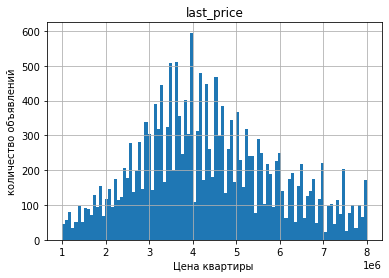

In [197]:
# построим гистограмму цен на квартиры 'last_price' 
ax=data.hist(column='last_price',range=(1000000,8000000),bins=100) 
plt.xlabel("Цена квартиры ")
plt.ylabel("количество объявлений")
plt.show()

<div class="alert alert-info"> <b>Комментарий студента:</b> Данные общей стоимости квартир не содержат выбросов и аномальных значений.</div>
    

## Площадь общая и цена


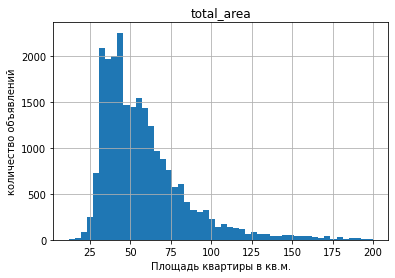

In [198]:
# построим гистограмму площади 'total_area' 
ax=data.hist(column='total_area',range=(12,200),bins=50) 
plt.xlabel("Площадь квартиры в кв.м.")
plt.ylabel("количество объявлений")
plt.show()

In [199]:
# знакомство со списком значений
print(data['total_area'].describe())

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64


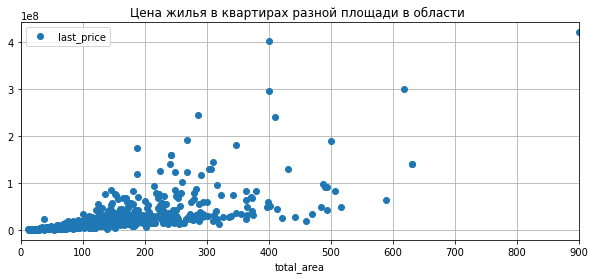

In [200]:
# график цены метра жилья и общей площади квартир
data.pivot_table(index='total_area',values='last_price').plot( style='o', xlim=(0, 900), grid=True, figsize=(10, 4))
plt.title("Цена жилья в квартирах разной площади в области ")

plt.show()

In [201]:
 # рассмотрим значения 'total_area'более 150
display(data.query('total_area>150'))



,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,metre_price,weekday_exposition,month_exposition,year_exposition,floor_type,living_total_area,kitchen_total_area
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14,90.63,9,False,False,False,9.1,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408.176101,4,7,2015,another_floor,0.570000,0.057233
42,13,22000000.0,161.8,2015-07-08T00:00:00,4,2.80,4,80.90,2,False,False,False,17.6,5,Петергоф,35416.0,30605.0,2.0,47.0,1.0,907.0,987.0,135.970334,2,7,2015,another_floor,0.500000,0.108776
51,7,45000000.0,161.0,2017-10-17T00:00:00,3,3.20,8,38.00,4,False,False,False,50.0,0,Санкт-Петербург,32537.0,6589.0,0.0,NaN,3.0,99.0,541.0,279.503106,1,10,2017,another_floor,0.236025,0.310559
121,20,33000000.0,180.0,2017-02-17T00:00:00,3,2.90,9,86.00,8,False,False,False,24.0,4,Санкт-Петербург,25689.0,4264.0,1.0,633.0,0.0,NaN,144.0,183.333333,4,2,2017,another_floor,0.477778,0.133333
147,10,27700000.0,179.6,2017-07-06T00:00:00,5,2.85,25,97.20,25,False,False,False,33.8,2,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,75.0,154.231626,3,7,2017,last_floor,0.541203,0.188196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23400,17,30000000.0,213.0,2017-09-28T00:00:00,7,3.40,5,151.40,5,False,False,False,30.8,0,Санкт-Петербург,21146.0,1225.0,2.0,342.0,3.0,30.0,299.0,140.845070,3,9,2017,last_floor,0.710798,0.144601
23448,3,14700000.0,180.0,2018-02-08T00:00:00,6,3.00,6,126.00,5,False,False,False,20.0,0,Санкт-Петербург,23955.0,5089.0,0.0,NaN,2.0,616.0,NaN,81.666667,3,2,2018,another_floor,0.700000,0.111111
23491,20,21800000.0,250.0,2017-09-16T00:00:00,3,2.65,12,104.00,7,False,False,False,45.0,0,Санкт-Петербург,43558.0,13138.0,0.0,NaN,0.0,NaN,49.0,87.200000,5,9,2017,another_floor,0.416000,0.180000
23549,5,19600000.0,184.0,2016-04-21T00:00:00,3,3.00,19,55.70,19,False,False,False,24.5,5,Санкт-Петербург,18995.0,4837.0,0.0,NaN,0.0,NaN,205.0,106.521739,3,4,2016,last_floor,0.302717,0.133152


In [202]:
# выведем количество  значений 'total_area' более 150 по местоположению
display(data.query('total_area>150').value_counts(['locality_name'])) 

locality_name          
Санкт-Петербург            527
Пушкин                      10
Петергоф                     3
посёлок Репино               2
Сестрорецк                   2
Выборг                       2
посёлок Стрельна             2
Павловск                     2
Красное Село                 2
Кронштадт                    1
Сертолово                    1
Колпино                      1
деревня Бор                  1
деревня Новое Девяткино      1
деревня Хязельки             1
посёлок Александровская      1
посёлок Парголово            1
Зеленогорск                  1
Всеволожск                   1
dtype: int64

* Большее количество квартир имеют площадь до 75 кв.м. и стоимость кв.м. жилья до 200 тыс.руб. средняя площадь-60 кв.м. Медианное значение площади составляет 52 кв.м. Подавляющее (94%) количество большых квартир находится в Санкт-Петербурге.

<div class="alert alert-info"> <b>Комментарий студента:</b> Примем за выбросы 'total_area>150'.</div>
    

In [203]:
# знакомство со списком значений 'last_price' в млн.руб. для удобства восприятия
print((data['last_price']/1000000).describe())

count    23650.000000
mean         6.541127
std         10.896399
min          0.012190
25%          3.400000
50%          4.650000
75%          6.799000
max        763.000000
Name: last_price, dtype: float64


Text(0, 0.5, 'количество объявлений')

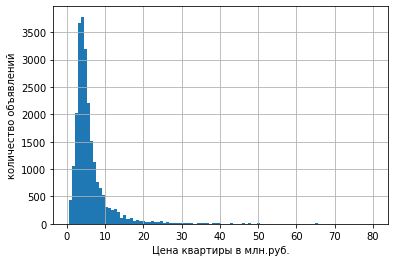

In [204]:
 # выведем гистограмму цены квартиры 'last_price' в млн.руб. для удобства восприятия
(data['last_price']/1000000).hist(range=(0.5,80),bins=100)
plt.xlabel("Цена квартиры в млн.руб.")
plt.ylabel("количество объявлений")

In [205]:
# рассмотрим выбросы значений 'last_price' более 20 млн.руб.
display(data.query('last_price>20000000')) 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,metre_price,weekday_exposition,month_exposition,year_exposition,floor_type,living_total_area,kitchen_total_area
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14,90.63,9,False,False,False,9.10,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408.176101,4,7,2015,another_floor,0.570000,0.057233
42,13,22000000.0,161.8,2015-07-08T00:00:00,4,2.80,4,80.90,2,False,False,False,17.60,5,Петергоф,35416.0,30605.0,2.0,47.0,1.0,907.0,987.0,135.970334,2,7,2015,another_floor,0.500000,0.108776
51,7,45000000.0,161.0,2017-10-17T00:00:00,3,3.20,8,38.00,4,False,False,False,50.00,0,Санкт-Петербург,32537.0,6589.0,0.0,NaN,3.0,99.0,541.0,279.503106,1,10,2017,another_floor,0.236025,0.310559
121,20,33000000.0,180.0,2017-02-17T00:00:00,3,2.90,9,86.00,8,False,False,False,24.00,4,Санкт-Петербург,25689.0,4264.0,1.0,633.0,0.0,NaN,144.0,183.333333,4,2,2017,another_floor,0.477778,0.133333
147,10,27700000.0,179.6,2017-07-06T00:00:00,5,2.85,25,97.20,25,False,False,False,33.80,2,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,75.0,154.231626,3,7,2017,last_floor,0.541203,0.188196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23491,20,21800000.0,250.0,2017-09-16T00:00:00,3,2.65,12,104.00,7,False,False,False,45.00,0,Санкт-Петербург,43558.0,13138.0,0.0,NaN,0.0,NaN,49.0,87.200000,5,9,2017,another_floor,0.416000,0.180000
23516,3,22529250.0,139.5,2018-07-04T00:00:00,4,3.30,16,82.55,9,False,False,False,13.84,0,Санкт-Петербург,37434.0,8460.0,1.0,441.0,2.0,427.0,266.0,161.500000,2,7,2018,another_floor,0.591756,0.099211
23574,14,64990000.0,139.0,2015-11-24T00:00:00,3,3.00,8,3.00,8,False,False,False,16.00,1,Санкт-Петербург,33255.0,5975.0,1.0,630.0,3.0,100.0,280.0,467.553957,1,11,2015,last_floor,0.021583,0.115108
23590,0,21187872.0,123.3,2017-04-25T00:00:00,3,2.65,1,50.40,18,False,False,False,23.60,0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0,171.840000,1,4,2017,another_floor,0.408759,0.191403


In [206]:
# выведем количество значений более 20 млн.руб. по местоположению
display(data.query('last_price>20000000').value_counts(['locality_name'])) 

locality_name  
Санкт-Петербург    688
Пушкин               9
Петергоф             2
Всеволожск           1
Зеленогорск          1
Колпино              1
Красное Село         1
Сестрорецк           1
деревня Бор          1
посёлок Репино       1
dtype: int64

97,5 % квартир стоимостью более 20 000 000,0 руб. находятся в Санкт-Петербурге

<div class="alert alert-info"> <b>Комментарий студента:</b> Примем за выбросы last_price>20000000 </div>
    

##  Количество комнат и цена

count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


Text(0, 0.5, 'количество объявлений')

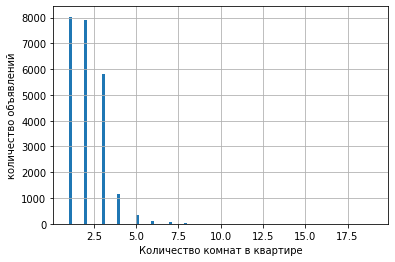

In [207]:
# познакомимся с данными
print(data['rooms'].describe())

# выведем гистограмму количества комнат 'rooms'
data['rooms'].hist(range=(1,19),bins=100) # гистограмма количества комнат 'rooms'
plt.xlabel("Количество комнат в квартире")
plt.ylabel("количество объявлений")

Медианное значение количества комнат составляет 2 комнаты. Объявления  с  количеством комнат более 6 нетипичны. Проанализируем эти объявления.

In [208]:
# исследуем объявления с количеством комнат болше 6 
# посмотрим  количество объявлений в разрезе населённых пунктов 
print(data.query('rooms>=6').value_counts(['locality_name']))


locality_name    
Санкт-Петербург      186
Пушкин                 3
Колпино                1
Красное Село           1
Павловск               1
Сосновый Бор           1
деревня Бор            1
посёлок Парголово      1
dtype: int64


95% квартир с количеством комнат 6 и более нахидятся в г. Санкт-Петербурге.

In [209]:
# проанализируем данные объявлений
display(data.query('rooms>=6').head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,metre_price,weekday_exposition,month_exposition,year_exposition,floor_type,living_total_area,kitchen_total_area
52,20,11795000.0,136.0,2017-09-22T00:00:00,6,3.00,2,94.00,2,False,False,False,11.0,1,Санкт-Петербург,16510.0,6582.0,1.0,526.0,0.0,NaN,NaN,86.727941,4,9,2017,last_floor,0.691176,0.080882
201,5,10880000.0,123.1,2015-11-12T00:00:00,6,3.20,5,89.00,2,False,False,False,11.0,0,Санкт-Петербург,26009.0,3369.0,2.0,516.0,0.0,NaN,992.0,88.383428,3,11,2015,another_floor,0.722989,0.089358
464,15,66571000.0,280.3,2015-06-11T00:00:00,6,5.20,8,159.50,7,False,False,False,21.1,0,Санкт-Петербург,26316.0,6655.0,3.0,187.0,1.0,616.0,578.0,237.499108,3,6,2015,another_floor,0.569033,0.075276
509,5,90000000.0,225.0,2016-06-26T00:00:00,6,2.65,4,134.00,2,False,False,False,19.5,2,Санкт-Петербург,32864.0,5720.0,0.0,NaN,2.0,519.0,416.0,400.000000,6,6,2016,another_floor,0.595556,0.086667
581,20,65000000.0,365.0,2019-03-18T00:00:00,7,2.90,7,208.05,7,False,False,False,9.1,0,Санкт-Петербург,19827.0,1690.0,3.0,378.0,3.0,58.0,NaN,178.082192,0,3,2019,last_floor,0.570000,0.024932


In [210]:
# для анализа отбросим квартиры с количеством комнат более 6 и отличным от 0 
price_rooms = data.query('0!=rooms<=6').pivot_table(index='rooms',values='last_price', aggfunc=['median','count'])
# переименуем назнвания столбцов
price_rooms.columns=['last_price','count'] 
print(price_rooms) # выведем на экран список


       last_price  count
rooms                   
1       3600000.0   8036
2       4770169.0   7924
3       6200000.0   5797
4       9000000.0   1175
5      14000000.0    326
6      19000000.0    105


С увеличением количества комнат цена квартир растёт.

<div class="alert alert-info"> <b>Комментарий студента:</b> Примем за выбросы количество комнат rooms >=6 .</div>
    

##  Высота потолков  и цена.

count    23650.000000
mean         2.724311
std          0.989255
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64


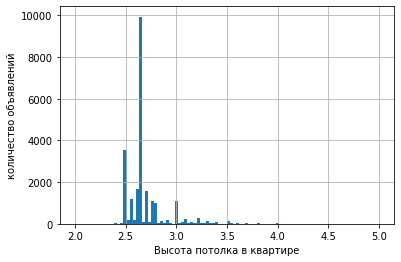

In [211]:
# выведем гистограмму площади 'ceiling_height'
data['ceiling_height'].hist(range=(2,5),bins=100) 
plt.xlabel("Высота потолка в квартире")
plt.ylabel("количество объявлений")
print(data['ceiling_height'].describe())

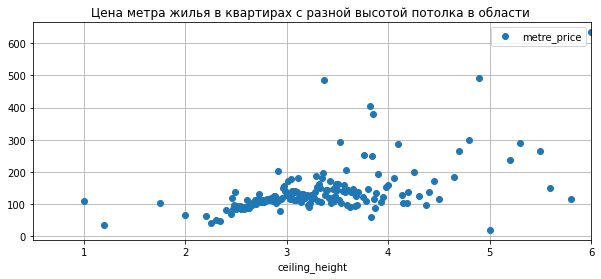

In [212]:
# выведем диаграмму зависимости цены от высоты потолков
data.pivot_table(index='ceiling_height',values='metre_price').plot( style='o', xlim=(0.5, 6), grid=True, figsize=(10, 4))

plt.title("Цена метра жилья в квартирах c разной высотой потолка в области ")

plt.show()

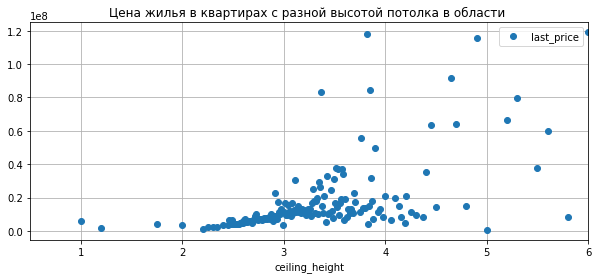

In [213]:
# выведем диаграмму зависимости цены квартиры от высоты потолков
data.pivot_table(index='ceiling_height',values='last_price').plot( style='o', xlim=(0.5, 6), grid=True, figsize=(10, 4))

plt.title("Цена жилья в квартирах c разной высотой потолка в области ")

plt.show()

Медианная высота потолка составляет 2,65 м. На диаграмме рассеяния видим, что на участке от 2,3 до 2,7 наблюдается динамика роста цены, затем рост останавливается. Остальные значения имеют характер выбросов. 

##  Длительность продажи квартиры и цена

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64


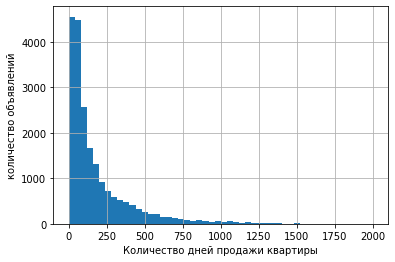

In [214]:
# гистограмма площади 'days_exposition'
data['days_exposition'].hist(range=(0,2000),bins=50) 
plt.xlabel("Количество дней продажи квартиры")
plt.ylabel("количество объявлений")
print(data['days_exposition'].describe())

Как видно на гистограмме, большинство квартир продается в течение года. Среднее значение времени продажи составляет около полугода (181 день) Количество квартир проданных через 500 дней и более составляет менее 3%.

(-1.0, 700.0)

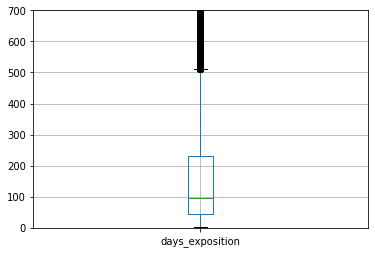

In [215]:
 
plt.xlim(0, 2) 
data .boxplot('days_exposition')
plt.ylim(-1, 700)


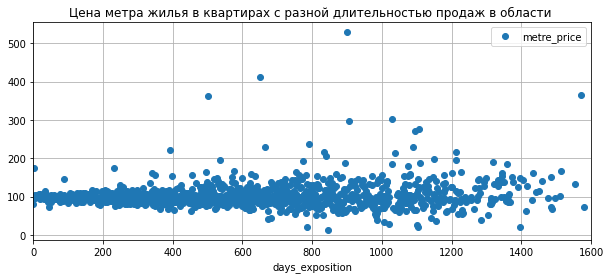

In [216]:
# выведем диаграмму зависимости цены от длительности продажи квартиры
data.pivot_table(index='days_exposition',values='metre_price').plot( style='o', xlim=(0, 1600), grid=True, figsize=(10, 4))

plt.title("Цена метра жилья в квартирах c разной длительностью продаж в области ")

plt.show()

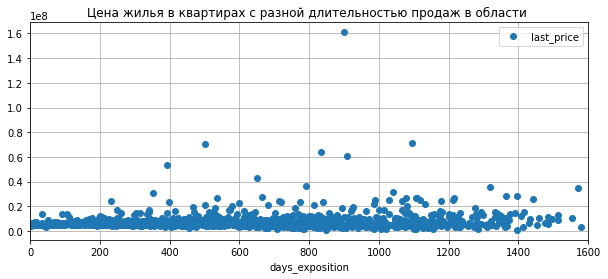

In [217]:
# выведем диаграмму зависимости цены квартиры от длительности продажи квартиры
data.pivot_table(index='days_exposition',values='last_price').plot( style='o', xlim=(0, 1600), grid=True, figsize=(10, 4))

plt.title("Цена жилья в квартирах c разной длительностью продаж в области ")

plt.show()

Чем дольше квартира продаётся, тем бОльший разброс цен . Средний показатель длительности продаж-181 день, медианный-95 дней.

<div class="alert alert-info"> <b>Комментарий студента:</b> Количество дней более 500 будем считать выбросами.</div>
    

## Тип этажа .

Проверим как зависит цена метра жилья от этажа квартиры: первый, последний или другой


In [218]:
price_floor_type = data.pivot_table(index='floor_type',values='metre_price')
print(price_floor_type)

               metre_price
floor_type                
another_floor   103.419579
first_floor      82.315168
last_floor       93.378958


In [219]:
price_floor_type = data.pivot_table(index='floor_type',values='last_price')
print(price_floor_type)

                 last_price
floor_type                 
another_floor  6.669572e+06
first_floor    4.820066e+06
last_floor     7.359138e+06


Данные показывают, что стоимость метра жилой площади на первых этажах ниже, чем на остальных, а на других этажах- выше , чем на всех остальных.

##  Дата размещения (год, месяц и день недели).

                 metre_price
year_exposition             
2014              124.302356
2015              104.719099
2016               98.295373
2017               97.637360
2018               97.800066
2019              107.123780


<AxesSubplot:xlabel='year_exposition'>

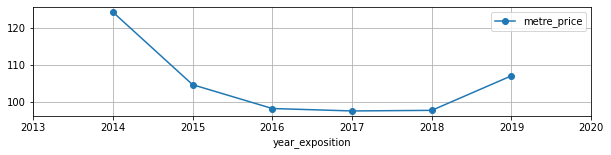

In [220]:
# сохраним в переменной price_date_year сводную таблицу по годам
price_date_year = data.pivot_table(index='year_exposition',values='metre_price') #
 # выведем на экран price_date_year
print(price_date_year)
data.pivot_table(index='year_exposition',values='metre_price').plot( style='o-', xlim=(2013, 2020), grid=True, figsize=(10, 2))

                   last_price
year_exposition              
2014             1.204660e+07
2015             8.592727e+06
2016             6.829415e+06
2017             6.585822e+06
2018             5.952216e+06
2019             6.782388e+06


<AxesSubplot:xlabel='year_exposition'>

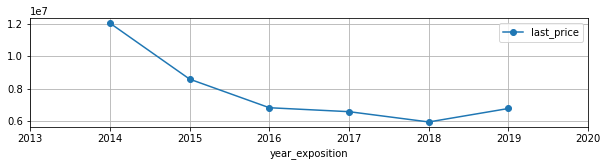

In [221]:
# сохраним в переменной price_date_year сводную таблицу по годам
price_date_year = data.pivot_table(index='year_exposition',values='last_price') #
 # выведем на экран price_date_year
print(price_date_year)
data.pivot_table(index='year_exposition',values='last_price').plot( style='o-', xlim=(2013, 2020), grid=True, figsize=(10, 2))

При первом взгляде на данные видим, что цена на метр жилья была на максимальном уровне в 2014 году, затем до 2017 года цена снижалась, а в 2018,2019 годах наметился рост. Но год на год не приходится, поэтому имеет смысл рассмотреть эти данные по месяцам.

In [222]:
# сохраним в переменной price_date_month сводную таблицу по месяцам и годам
price_date_month = data.pivot_table(index='month_exposition',columns='year_exposition',values='metre_price') #
# выведем на экран price_date_month
display(price_date_month) 

year_exposition,2014,2015,2016,2017,2018,2019
month_exposition,,,,,,
1,NaN,125.086139,97.038071,101.878630,94.916533,102.092413
2,NaN,104.735472,99.178879,97.811713,93.745347,110.668781
3,NaN,97.549718,98.236089,93.526131,93.874728,106.820783
4,NaN,100.753379,93.087909,99.173075,104.066466,107.082035
5,NaN,95.839562,98.504701,95.232459,105.293386,114.911325
6,NaN,111.037011,103.503686,92.386984,97.329066,NaN
7,NaN,106.585775,95.740739,103.536527,96.919161,NaN
8,NaN,116.206274,89.956717,98.569603,100.834110,NaN
9,NaN,108.047946,98.783372,100.656383,99.669831,NaN


исследуя изменение цены метра жилья  в зависимости от месяца подачи объявлений, установлено, что пиковые значения в разных годах приходятся на разные месяцы, данные по 2014 и 2019 годам не годятся для анализа, т.к. выборка в эти годы сделана за неполное количество месяцев.

In [223]:
# сохраним в переменную price_date_weekday_exposition сводную таблицу по дням недели
price_date_weekday_exposition = data.pivot_table(index='weekday_exposition',values='metre_price') #
print(price_date_weekday_exposition) # выведем на экран price_date_weekday_exposition

                    metre_price
weekday_exposition             
0                     99.470371
1                     99.724552
2                     99.605974
3                    100.193164
4                     98.987215
5                     99.066258
6                     97.763150


In [224]:
# сохраним в переменную price_date_weekday_exposition сводную таблицу по дням недели
price_date_weekday_exposition = data.pivot_table(index='weekday_exposition',values='last_price') #
print(price_date_weekday_exposition) # выведем на экран price_date_weekday_exposition

                      last_price
weekday_exposition              
0                   6.510815e+06
1                   6.393782e+06
2                   6.626416e+06
3                   6.711767e+06
4                   6.364605e+06
5                   6.982510e+06
6                   6.249360e+06


<div class="alert alert-info">наблюдая данные в разрезе дней недели, замечаем  минимальную цену в воскресенье и максимальную - в субботу, разница составляет более 10%.
    </div>

##  Расположение и цена. 10 населённых пунктов с наибольшим числом объявлений.

In [225]:
 # выведе на экран колонки 'first_day_exposition' и 'locality_name'
print(data[['first_day_exposition','locality_name']].head())

  first_day_exposition    locality_name
0  2019-03-07T00:00:00  Санкт-Петербург
1  2018-12-04T00:00:00   посёлок Шушары
2  2015-08-20T00:00:00  Санкт-Петербург
3  2015-07-24T00:00:00  Санкт-Петербург
4  2018-06-19T00:00:00  Санкт-Петербург


In [226]:
# в переменной price_locality_name сохраним объявления с ценой метра жилья и указанием населённого пункта
price_locality_name=data[['first_day_exposition','locality_name','metre_price']]

#  10 налелённых пунктов с наибольшим количеством объявлений
print(price_locality_name.value_counts('locality_name').head(10)) 


locality_name
Санкт-Петербург      15721
посёлок Мурино         522
посёлок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
посёлок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
dtype: int64


In [227]:
# сохраним в перерменной price_locality_name_good количество объявлений и среднюю цену метра жилья
price_locality_name_good = price_locality_name.pivot_table(index='locality_name',values='metre_price',aggfunc=['mean','count'])
 
# переименуем колонки чтобы устранить двойное название
price_locality_name_good.columns = ['metre_price','count']

# оставим с списке первые 10 населённых пунктов с наибольшим количеством объявлений
price_locality_name_good = price_locality_name_good.query('count >=237') 

# выведем на экран список
print(price_locality_name_good)  


                   metre_price  count
locality_name                        
Всеволожск           68.654474    398
Выборг               58.141909    237
Гатчина              68.746147    307
Колпино              75.424579    338
Пушкин              103.125819    369
Санкт-Петербург     114.849009  15721
деревня Кудрово      92.473548    299
посёлок Мурино       85.752189    522
посёлок Парголово    90.175913    327
посёлок Шушары       78.677364    440


count     10.000000
mean      83.602095
std       17.216150
min       58.141909
25%       70.415755
50%       82.214777
75%       91.899139
max      114.849009
Name: metre_price, dtype: float64


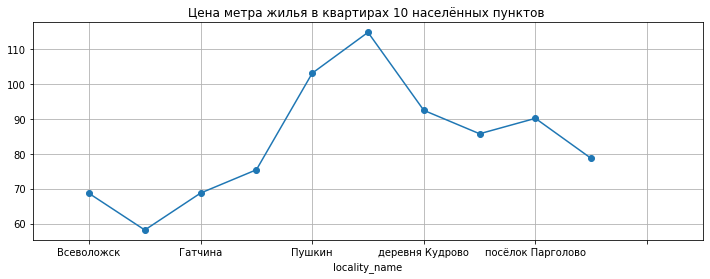

In [228]:
print(price_locality_name_good['metre_price'].describe())
# выведем диаграмму зависимости цены квартиры от длительности продажи квартиры
price_locality_name_good['metre_price'].plot( style='-o', xlim=(-1,11), grid=True, figsize=(12, 4))

plt.title("Цена метра жилья в квартирах 10 населённых пунктов ")

plt.show()

<div class="alert alert-info"> <b></b>Наименьшая средняя цена среди 10 населённых пунктов в г.Выборг- 58 тыс.руб., наибольшая- в Санкт-Петербурге-114 тыс.руб.
    </div>

In [229]:
# в переменной price_locality_name_last_price сохраним объявления с ценой  жилья и указанием населённого пункта
price_locality_name_last_price=data[['first_day_exposition','locality_name','last_price']]

#  10 налелённых пунктов с наибольшим количеством объявлений
print(price_locality_name_last_price.value_counts('locality_name').head(10)) 


locality_name
Санкт-Петербург      15721
посёлок Мурино         522
посёлок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
посёлок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
dtype: int64


In [230]:
# сохраним в перерменной price_locality_name_good_last_price количество объявлений и медианную цену жилья
price_locality_name_good_last_price = price_locality_name_last_price.pivot_table(index='locality_name',values='last_price',aggfunc=['median','count'])
 
# переименуем колонки чтобы устранить двойное название
price_locality_name_good_last_price.columns = ['last_price','count']

# оставим с списке первые 10 населённых пунктов с наибольшим количеством объявлений
price_locality_name_good_last_price = price_locality_name_good_last_price.query('count >=237') 

# выведем на экран список
print(price_locality_name_good_last_price)  


                   last_price  count
locality_name                       
Всеволожск          3450000.0    398
Выборг              2897000.0    237
Гатчина             3100000.0    307
Колпино             3600000.0    338
Пушкин              5180000.0    369
Санкт-Петербург     5500000.0  15721
деревня Кудрово     3790000.0    299
посёлок Мурино      3400000.0    522
посёлок Парголово   4100000.0    327
посёлок Шушары      3950000.0    440


count    1.000000e+01
mean     3.896700e+06
std      8.459971e+05
min      2.897000e+06
25%      3.412500e+06
50%      3.695000e+06
75%      4.062500e+06
max      5.500000e+06
Name: last_price, dtype: float64


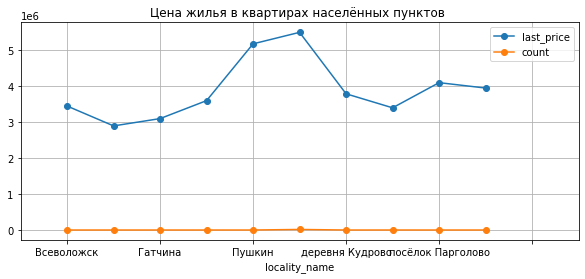

In [231]:
print(price_locality_name_good_last_price['last_price'].describe())
# выведем диаграмму зависимости цены квартиры от длительности продажи квартиры
price_locality_name_good_last_price.plot( style='-o', xlim=(-1, 11), grid=True, figsize=(10, 4))

plt.title("Цена жилья в квартирах населённых пунктов ")

plt.show()

<div class="alert alert-info">Наименьшая средняя цена на квартиры в Выборге-2897000, наибольшая - в Санкт-Петербурге-5500000. Объявления в Санкт Петербурге проверим более детально.</div>

## Коэффициенты жилой прощади и площади кухни к общей плошади.

count    23650.000000
mean         0.565171
std          0.101078
min          0.021583
25%          0.500000
50%          0.570000
75%          0.631579
max          1.000000
Name: living_total_area, dtype: float64


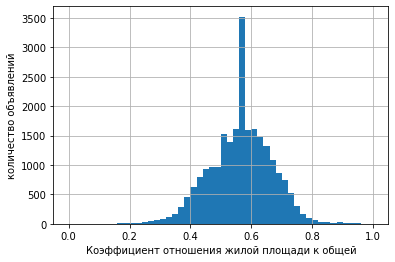

In [232]:
# выведем гистограмму коэффициентов отношения жилой площади к общей
data['living_total_area'].hist(range=(0,1),bins=50) 
plt.xlabel("Коэффициент отношения жилой площади к общей")
plt.ylabel("количество объявлений")
# выведем общие данные по таблице
print(data['living_total_area'].describe())

count    23650.000000
mean         0.189477
std          0.075805
min          0.018200
25%          0.133824
50%          0.173913
75%          0.234694
max          0.787879
Name: kitchen_total_area, dtype: float64


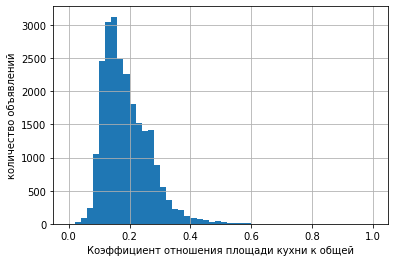

In [233]:
# выведем гистограмму коэффициентов отношения площади кухни к общей
data['kitchen_total_area'].hist(range=(0,1),bins=50) 
plt.xlabel("Коэффициент отношения площади кухни к общей")
plt.ylabel("количество объявлений")
# выведем общие данные по таблице
print(data['kitchen_total_area'].describe())

In [234]:
# выведем объявления с нетипичными значениями коэффициентов
display(data.query('living_total_area<0.2'and'kitchen_total_area>0.4').head(20))

# посчитаем сколько таких нетипичных объявлений
print(len(data.query('living_total_area<0.2'and'kitchen_total_area>0.4')))


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,metre_price,weekday_exposition,month_exposition,year_exposition,floor_type,living_total_area,kitchen_total_area
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100.000000,1,6,2018,another_floor,0.320000,0.410000
123,2,4300000.0,48.00,2019-04-04T00:00:00,1,2.65,22,14.00,5,False,False,False,23.80,0,Санкт-Петербург,16951.0,15747.0,0.0,NaN,1.0,1097.0,9.0,89.583333,3,4,2019,another_floor,0.291667,0.495833
454,6,7950000.0,51.60,2017-11-10T00:00:00,1,2.65,10,12.70,10,False,False,False,23.10,2,Санкт-Петербург,23562.0,7508.0,1.0,287.0,1.0,670.0,98.0,154.069767,4,11,2017,last_floor,0.246124,0.447674
511,7,5950000.0,69.00,2017-12-21T00:00:00,1,2.65,16,13.00,12,False,False,False,50.00,1,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,56.0,86.231884,3,12,2017,another_floor,0.188406,0.724638
615,15,4100000.0,43.00,2017-06-30T00:00:00,1,2.65,18,10.00,12,False,False,False,20.00,2,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,18.0,95.348837,4,6,2017,another_floor,0.232558,0.465116
680,14,7200000.0,43.00,2017-10-31T00:00:00,1,2.65,8,9.00,2,False,False,False,23.00,0,Санкт-Петербург,23900.0,5232.0,1.0,2137.0,1.0,933.0,296.0,167.441860,1,10,2017,another_floor,0.209302,0.534884
696,1,3364930.0,34.69,2014-11-27T00:00:00,1,2.64,25,23.43,25,False,False,False,23.43,2,Санкт-Петербург,43396.0,12153.0,0.0,NaN,0.0,NaN,574.0,97.000000,3,11,2014,last_floor,0.675411,0.675411
716,5,1500000.0,17.00,2017-06-07T00:00:00,0,2.70,9,12.00,1,False,True,False,9.10,0,посёлок Шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40.0,88.235294,2,6,2017,first_floor,0.705882,0.535294
723,9,5850000.0,81.00,2018-05-04T00:00:00,2,2.65,5,30.00,5,False,False,False,36.60,0,Санкт-Петербург,21172.0,6119.0,1.0,292.0,1.0,426.0,176.0,72.222222,4,5,2018,last_floor,0.370370,0.451852
779,18,5100000.0,40.40,2018-10-13T00:00:00,1,3.20,5,11.00,5,False,False,False,19.90,0,Санкт-Петербург,24538.0,4944.0,1.0,181.0,0.0,NaN,17.0,126.237624,5,10,2018,last_floor,0.272277,0.492574


350


Анализируя гистограммы значений коэффициентов и объявления с нетипичными значениями коэффициентов, установлено, что в объявлениях  жилая площадь соизмерима или больше, чем площадь кухни. Возможно это ошибки при заполнении полей в объявлении.

# Распределение и определение выбросов в Санкт-Петербурге.

In [235]:
# сохраним в переменной spb_price_location данные по квартирам в Санкт-Петербурге
spb_price_location=data.loc[data['locality_name']=='Санкт-Петербург',]

# общее количество объявлений по Санкт-Петербургу
print('Oбщее количество объявлений по Санкт-Петербургу:',len(spb_price_location))

#выведем на экран первые 5 строк переменной spb_price_location
display(spb_price_location.head()) 

Oбщее количество объявлений по Санкт-Петербургу: 15721


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,metre_price,weekday_exposition,month_exposition,year_exposition,floor_type,living_total_area,kitchen_total_area
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.000,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120.370370,3,3,2019,another_floor,0.472222,0.231481
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5,34.300,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92.785714,3,8,2015,another_floor,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14,90.630,9,False,False,False,9.1,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408.176101,4,7,2015,another_floor,0.570000,0.057233
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.000,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100.000000,1,6,2018,another_floor,0.320000,0.410000
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,2.65,24,40.812,22,False,False,False,18.9,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,110.544693,3,4,2019,another_floor,0.570000,0.263966


поскольку расстояние в city_centers_nearest указано в метрах, добавим столбец в целых колометрах

In [236]:
# добавим столбец в целых колометрах в spb_price_location и в data
spb_price_location['city_centers_nearest_km'] = (spb_price_location.loc[:,'city_centers_nearest']/1000).round(0)
data['city_centers_nearest_km'] = (data.loc[:,'city_centers_nearest']/1000).round(0)

#выведем на экран первые 5 строк переменной spb_price_location
display(spb_price_location.head()) 

/tmp/ipykernel_142/3743668526.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spb_price_location['city_centers_nearest_km'] = (spb_price_location.loc[:,'city_centers_nearest']/1000).round(0)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,metre_price,weekday_exposition,month_exposition,year_exposition,floor_type,living_total_area,kitchen_total_area,city_centers_nearest_km
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.000,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120.370370,3,3,2019,another_floor,0.472222,0.231481,16.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5,34.300,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92.785714,3,8,2015,another_floor,0.612500,0.148214,14.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14,90.630,9,False,False,False,9.1,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408.176101,4,7,2015,another_floor,0.570000,0.057233,7.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.000,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100.000000,1,6,2018,another_floor,0.320000,0.410000,8.0
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,2.65,24,40.812,22,False,False,False,18.9,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,110.544693,3,4,2019,another_floor,0.570000,0.263966,12.0


In [237]:
# сгруппируем данные по столбцу 'city_centers_nearest_km' в переменной и посчитаем медианную цену  жилья
spb_centers_nearest_median = spb_price_location.groupby('city_centers_nearest_km').agg({'last_price':'median'})

# выведем полученные данные на экран
print(spb_centers_nearest_median.head())

                         last_price
city_centers_nearest_km            
0.0                      17900000.0
1.0                      11395000.0
2.0                      10000000.0
3.0                       8409000.0
4.0                       9200000.0


<function matplotlib.pyplot.show(close=None, block=None)>

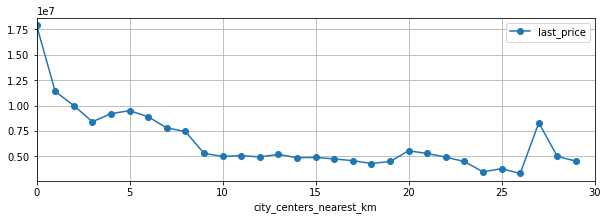

In [238]:
#построим график зависимости медианной цены метра жилья от удаленности от центра в километрах
spb_centers_nearest_median.plot( style='o-', xlim=(0, 30), grid=True, figsize=(10, 3)) 
plt.show

Цена метра меняется резко в 3  километрах от центра города. Затем идет резкий рост с 4 км. по 5 км. и спад с 5 км. до 8 км. после чего снижение идёт более плавно. На  28 километре есть пик - может это выброс, а может на этом расстоянии есть другой город или крупный населённый пункт. Определим центр города радиусом 3 километра и проведем анализ квартир в этой зоне. Про расстоянии с 4 км. по 10 км от центра города нужно собрать дополнительную информацию- очень похоже, что на этом расстоянии находятся элитные поселки с дорогими и большими квартирами.

<div class="alert alert-info"> <b></b> 
    Граница центра расширена до 8 км. Далее расчеты исправлены для границы центра 8 км.
    

</div>
    

In [239]:
# сохраним в переменной данные по объявлениям в центре города
spb_center = spb_price_location.query('city_centers_nearest_km <=8.0')

#выведем на экран первые 5 строк переменной spb_center
display(spb_center.head())  

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,metre_price,weekday_exposition,month_exposition,year_exposition,floor_type,living_total_area,kitchen_total_area,city_centers_nearest_km
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14,90.63,9,False,False,False,9.1,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408.176101,4,7,2015,another_floor,0.570000,0.057233,7.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.00,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100.000000,1,6,2018,another_floor,0.320000,0.410000,8.0
24,8,6500000.0,97.2,2015-10-31T00:00:00,2,2.65,3,46.50,1,False,False,False,19.6,0,Санкт-Петербург,20052.0,2336.0,3.0,411.0,3.0,124.0,265.0,66.872428,5,10,2015,first_floor,0.478395,0.201646,2.0
35,6,15500000.0,149.0,2017-06-26T00:00:00,5,2.65,5,104.00,4,False,False,False,17.0,0,Санкт-Петербург,23670.0,3502.0,0.0,NaN,1.0,779.0,644.0,104.026846,0,6,2017,another_floor,0.697987,0.114094,4.0
51,7,45000000.0,161.0,2017-10-17T00:00:00,3,3.20,8,38.00,4,False,False,False,50.0,0,Санкт-Петербург,32537.0,6589.0,0.0,NaN,3.0,99.0,541.0,279.503106,1,10,2017,another_floor,0.236025,0.310559,7.0


## Рассмотрим параметры квартир в центре города.

 

###  Общая площадь квартир центра города.

count    4122.000000
mean       90.326659
std        58.882906
min        12.000000
25%        55.000000
50%        76.000000
75%       107.000000
max       900.000000
Name: total_area, dtype: float64


Text(0, 0.5, 'количество объявлений')

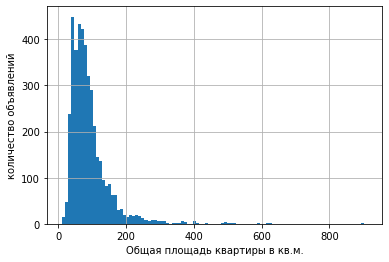

In [240]:
# знакомство со списком значений
print(spb_center['total_area'].describe())
 
# выведем гистограмму площади 'total_area'
spb_center['total_area'].hist(range=(12,910),bins=100)
plt.xlabel("Общая площадь квартиры в кв.м.")
plt.ylabel("количество объявлений")


(-0.1, 2.0)

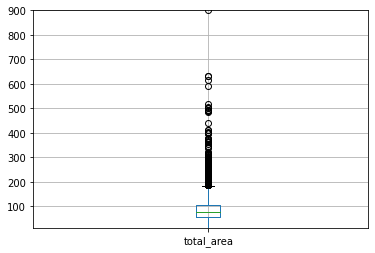

In [241]:
# выведем ящик с усами 'total_area'
spb_center.boxplot(['total_area']) 
plt.ylim(12,900)
plt.xlim(-0.1,2)

Анализируя гистограмму площади фмксируем выбросы после значения 200.  Медианное значение площади по городу составляет 85 кв.м.

### Цены на квартиры в центре города.

count    4122.000000
mean       14.180373
std        23.580489
min         1.600000
25%         6.450000
50%         8.960000
75%        13.900000
max       763.000000
Name: last_price, dtype: float64


Text(0, 0.5, 'количество объявлений')

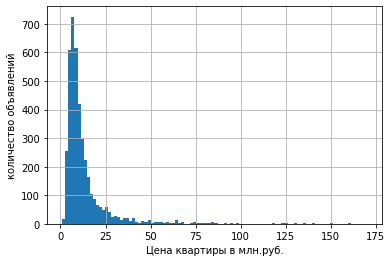

In [242]:
# знакомство со списком значений в млн.руб., для удобства восприятия освободились от нулей /1000000
print((spb_center['last_price']/1000000).describe())
# выведем гистограмму цен на квартиры 'last_price' в млн.руб.
(spb_center['last_price']/1000000).hist(range=(1,170),bins=100) 
plt.xlabel("Цена квартиры в млн.руб.")
plt.ylabel("количество объявлений")

Разброс цен очень большой, медианное значение цен на квартиры в городе составляет 9 млн.руб.,после показателя в 20 млн.руб. есть выбросы, по которым необходимо уточнять информацию.

### Цена за метр жилой площади в квартирах центра города.

count    4122.000000
mean      142.395596
std        88.208152
min        15.345269
25%       100.000000
50%       123.555374
75%       153.807434
max      1907.500000
Name: metre_price, dtype: float64


Text(0, 0.5, 'количество объявлений')

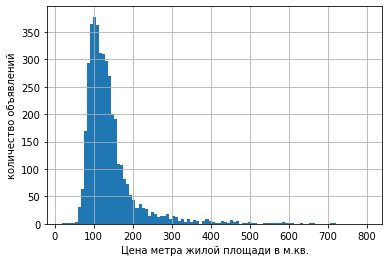

In [243]:
# знакомство со списком значений 
print(spb_center['metre_price'].describe())

# выведем гистограмму цены кв.м. жилья 'metre_price' 
(spb_center['metre_price']).hist(range=(20,800),bins=100) 
plt.xlabel("Цена метра жилой площади в м.кв.")
plt.ylabel("количество объявлений")

Медианное значение цены кв.метра жилья в городе составляет 123 тыс.руб. После показателя в 200 тыс.руб. незначительные выбросы.

In [244]:
# выведем для анализа 10 объявлений с самой высокой стоимостью метра жилья
display(spb_center.sort_values(by='metre_price',ascending=False).head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,metre_price,weekday_exposition,month_exposition,year_exposition,floor_type,living_total_area,kitchen_total_area,city_centers_nearest_km
12971,19,763000000.0,400.0,2017-09-30T00:00:00,7,2.65,10,250.00,10,False,False,False,9.1,2,Санкт-Петербург,25108.0,3956.0,1.0,530.0,3.0,756.0,33.0,1907.500000,5,9,2017,last_floor,0.625000,0.022750,4.0
1436,19,330000000.0,190.0,2018-04-04T00:00:00,3,3.50,7,95.00,5,False,False,False,40.0,0,Санкт-Петербург,23011.0,1197.0,3.0,519.0,3.0,285.0,233.0,1736.842105,2,4,2018,another_floor,0.500000,0.210526,1.0
22831,18,289238400.0,187.5,2019-03-19T00:00:00,2,3.37,6,63.70,6,False,False,False,30.2,0,Санкт-Петербург,22494.0,1073.0,3.0,386.0,3.0,188.0,NaN,1542.604800,1,3,2019,last_floor,0.339733,0.161067,1.0
14706,15,401300000.0,401.0,2016-02-20T00:00:00,5,2.65,9,204.00,9,False,False,False,24.0,3,Санкт-Петербург,21912.0,2389.0,1.0,545.0,1.0,478.0,393.0,1000.748130,5,2,2016,last_floor,0.508728,0.059850,2.0
4996,20,124000000.0,124.5,2017-10-12T00:00:00,4,3.00,4,67.20,2,False,False,False,20.0,0,Санкт-Петербург,20399.0,1722.0,3.0,302.0,3.0,172.0,45.0,995.983936,3,10,2017,another_floor,0.539759,0.160643,2.0
16461,17,245000000.0,285.7,2017-04-10T00:00:00,6,3.35,7,182.80,4,False,False,False,29.8,0,Санкт-Петербург,33143.0,6235.0,3.0,400.0,3.0,140.0,249.0,857.542877,0,4,2017,another_floor,0.639832,0.104305,6.0
17172,14,28000000.0,33.0,2019-04-30T00:00:00,1,3.50,5,18.81,2,False,False,False,9.1,0,Санкт-Петербург,23403.0,1462.0,3.0,342.0,3.0,27.0,NaN,848.484848,1,4,2019,another_floor,0.570000,0.275758,1.0
4859,16,28000000.0,33.0,2019-04-29T00:00:00,1,3.50,5,18.81,2,False,False,False,9.1,0,Санкт-Петербург,23447.0,1376.0,3.0,344.0,3.0,119.0,NaN,848.484848,0,4,2019,another_floor,0.570000,0.275758,1.0
16647,15,122000000.0,145.0,2017-04-25T00:00:00,3,3.30,6,36.00,2,False,False,False,72.0,0,Санкт-Петербург,33931.0,7023.0,2.0,478.0,3.0,250.0,335.0,841.379310,1,4,2017,another_floor,0.248276,0.496552,7.0
17912,17,135000000.0,166.0,2019-02-07T00:00:00,3,3.30,7,52.00,1,False,False,False,64.0,0,Санкт-Петербург,32863.0,5955.0,2.0,230.0,3.0,215.0,NaN,813.253012,3,2,2019,first_floor,0.313253,0.385542,6.0


Выбросы после границы 200 тыс.руб. простираются до  эначений 1736 тыс. руб. и заслуживают отдельного рассмотрения и сбора дополнительной информации . При беглом анализе общего признака кроме очень высокой цены установлено общее местоположение-Санкт-Петербург . 


### Количество комнат в квартирах центра города.

count    4122.000000
mean        2.757885
std         1.426035
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max        19.000000
Name: rooms, dtype: float64


Text(0, 0.5, 'количество объявлений')

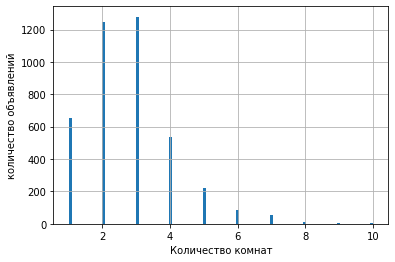

In [245]:
# знакомство со списком значений
print(spb_center['rooms'].describe())
# гистограмма количества комнат 'rooms'
spb_center['rooms'].hist(range=(1,10),bins=100) 
plt.xlabel("Количество комнат")
plt.ylabel("количество объявлений")

(-1.0, 10.0)

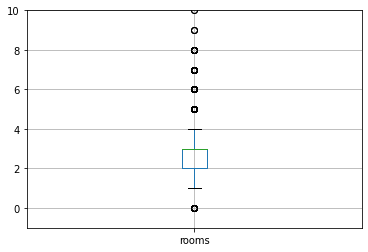

In [246]:
# выведем ящик с усами 
plt.xlim(0, 2) 
spb_center.boxplot('rooms')
plt.ylim(-1, 10)


Отбросим объявления с количеством комнат более 6 как выбросы. Сохраним в переменной price_rooms_spb
данные по центру города

In [247]:
# для анализа отбросим квартиры с количеством комнат более 6 и отличным от 0 
price_rooms_spb = spb_center.query('0!=rooms<=6').pivot_table(index='rooms',values='last_price', aggfunc=['median','count'])

# переименуем назнвания столбцов
price_rooms_spb.columns=['last_price','count'] 
print(price_rooms_spb) # выведем на экран список


       last_price  count
rooms                   
1       5800000.0    654
2       7605407.0   1246
3       9990000.0   1279
4      12500000.0    535
5      14995000.0    222
6      19500000.0     85


 Зависимость количества комнат и цены квартиры прямая, с ростом количества комнат растёт цена квартир. Медианное значение количества комнат по объявлениям в центре города составляет 3 комнаты.

### Высота потолков в квартирах центра города.

count    4122.000000
mean        2.963311
std         1.728423
min         2.000000
25%         2.650000
50%         2.800000
75%         3.100000
max       100.000000
Name: ceiling_height, dtype: float64


Text(0, 0.5, 'количество объявлений')

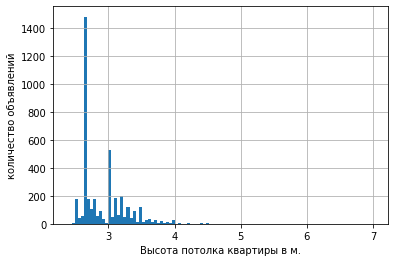

In [248]:
# знакомство со списком значений
print(spb_center['ceiling_height'].describe())

# гистограмма высоты потолков 'ceiling_height'
spb_center['ceiling_height'].hist(range=(2.4,7),bins=100) 
plt.xlabel("Высота потолка квартиры в м.")
plt.ylabel("количество объявлений")

Высота потолка 27,0 является выбросом, медианная высота в центре города составляет 3 метра.

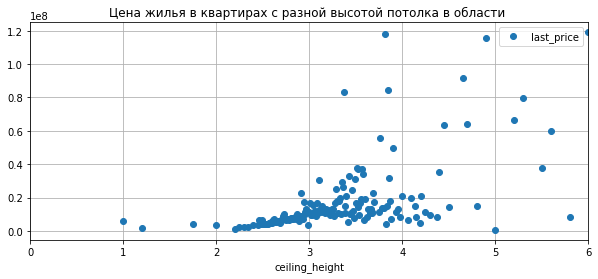

In [249]:
# выведем диаграмму зависимости цены от высоты потолкаов квартиры
data.pivot_table(index='ceiling_height',values='last_price').plot( style='o', xlim=(0, 6), grid=True, figsize=(10, 4))

plt.title("Цена жилья в квартирах c разной высотой потолка в области ")

plt.show()

#  Анализ факторов влияющих на стоимость квартиры в центре города:  этаж, число комнат, удаленность от центра, срок размещения объявления в сравнении с данными по области.

## Этаж и цена.

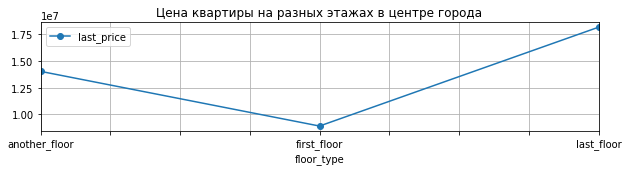

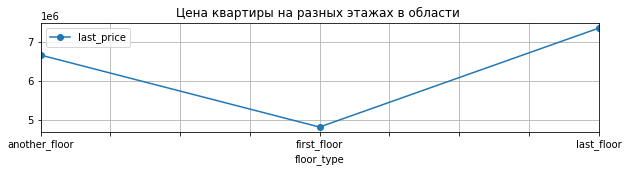

In [250]:
# выведем зависимость стоимости метра жилья от этажа квартиры в центре города
spb_center.pivot_table(index='floor_type',values='last_price').plot( style='o-', xlim=(0, 2), grid=True, figsize=(10, 2))
plt.title("Цена квартиры на разных этажах в центре города")

# выведем зависимость стоимости метра жилья от этажа квартиры в области
data.pivot_table(index='floor_type',values='last_price').plot( style='o-', xlim=(0, 2), grid=True, figsize=(10, 2))
plt.title("Цена квартиры на разных этажах в области ")

plt.show()

Динамика кривой одинакова как в центре города так и в области в целом, но цена за кв.м. в центре города выше.

## Количество комнат и цена.

In [251]:
# выведем общую информацию price_rooms_spb
price_rooms_spb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 1 to 6
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   last_price  6 non-null      float64
 1   count       6 non-null      int64  
dtypes: float64(1), int64(1)
memory usage: 144.0 bytes


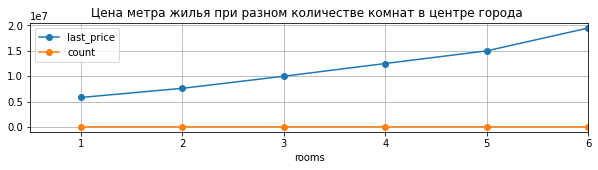

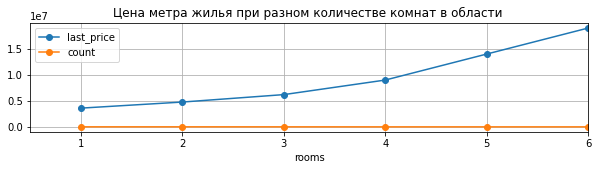

In [252]:
# выведем зависимость стоимости  жилья от количества комнат в квартирах центра города
price_rooms_spb.plot( style='o-', xlim=(0.5,6), grid=True, figsize=(10, 2)) 
plt.title("Цена метра жилья при разном количестве комнат в центре города ")

# выведем зависимость стоимости  жилья от количества комнат в квартирах области
price_rooms.plot( style='o-', xlim=(0.5, 6), grid=True, figsize=(10, 2)) 
plt.title("Цена метра жилья при разном количестве комнат в области ")

plt.show()


Кривая зависимости цены жилья от количества комнат в центре города и в целом по области ведуд себя сходным образом.Цены в центре города выше цен по области.

In [253]:
# посмотрим сколько и как далеко от центра находится  квартиры  с количеством комнат более 6 
print(data.query('rooms>=6').value_counts(['city_centers_nearest_km']))

city_centers_nearest_km
5.0                        41
4.0                        29
6.0                        28
2.0                        21
3.0                        20
1.0                        13
10.0                        6
7.0                         5
8.0                         5
34.0                        3
15.0                        2
23.0                        2
11.0                        2
13.0                        2
17.0                        2
31.0                        1
29.0                        1
28.0                        1
0.0                         1
21.0                        1
18.0                        1
14.0                        1
9.0                         1
12.0                        1
dtype: int64


Основная часть объявлений с количеством 6 комнат и более  находится в пределах 10 км. от центра города.

## Расстояние до центра и цена.

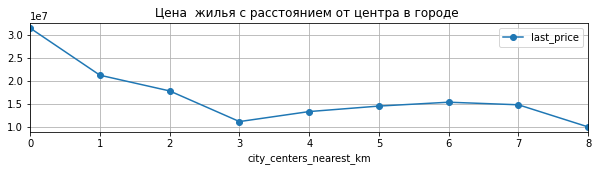

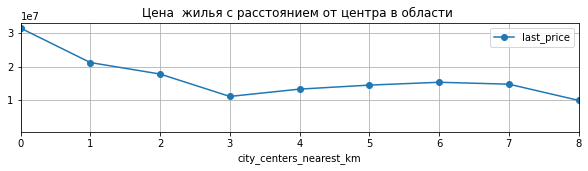

In [254]:
# выведем зависимость стоимости  жилья от расстояния от центра города
spb_center.pivot_table(index='city_centers_nearest_km',values='last_price').plot( style='o-', xlim=(0, 8), grid=True, figsize=(10, 2))
plt.title("Цена  жилья с расстоянием от центра в городе ")
data.pivot_table(index='city_centers_nearest_km',values='last_price').plot( style='o-', xlim=(0, 8), grid=True, figsize=(10, 2)) 
plt.title("Цена  жилья с расстоянием от центра в области ")
plt.show()

Кривая цен в зависимости от расстояния от центра города в центре показвает более резкий спад на расстоянии 3 км от центра, чем кривая цены по оласти. В остальном динамика совпадает.

## Длительность размещения объявления и цена.

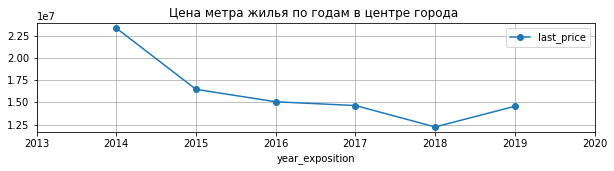

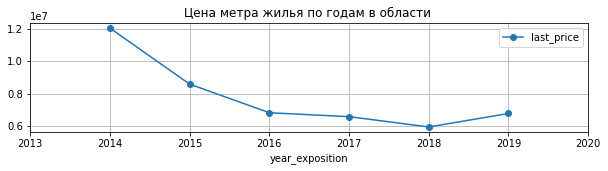

In [255]:
# выведем графики зависимости цены от даты размещения объявления в центре города и в общем по области 
spb_center.pivot_table(index='year_exposition',values='last_price').plot( style='o-', xlim=(2013,2020), grid=True, figsize=(10, 2))
plt.title("Цена метра жилья по годам в центре города ")

data.pivot_table(index='year_exposition',values='last_price').plot( style='o-', xlim=(2013, 2020), grid=True, figsize=(10, 2))
plt.title("Цена метра жилья по годам в области ")

plt.show()


Динамика цен в зависимости от года публикации объявления в центре города и по области совпадает, но общий уровень цен по области ниже.

<function matplotlib.pyplot.show(close=None, block=None)>

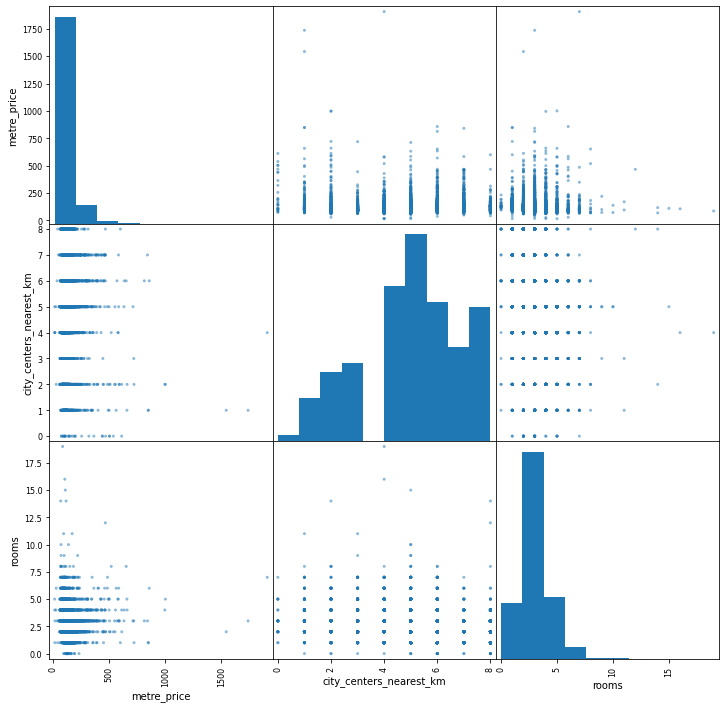

In [256]:
# выведем матрицу диаграмм рассеяния для центра города
spb_center_filtered = spb_center[['metre_price','city_centers_nearest_km','rooms']]
pd.plotting.scatter_matrix(spb_center_filtered, figsize=(12, 12)) 
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

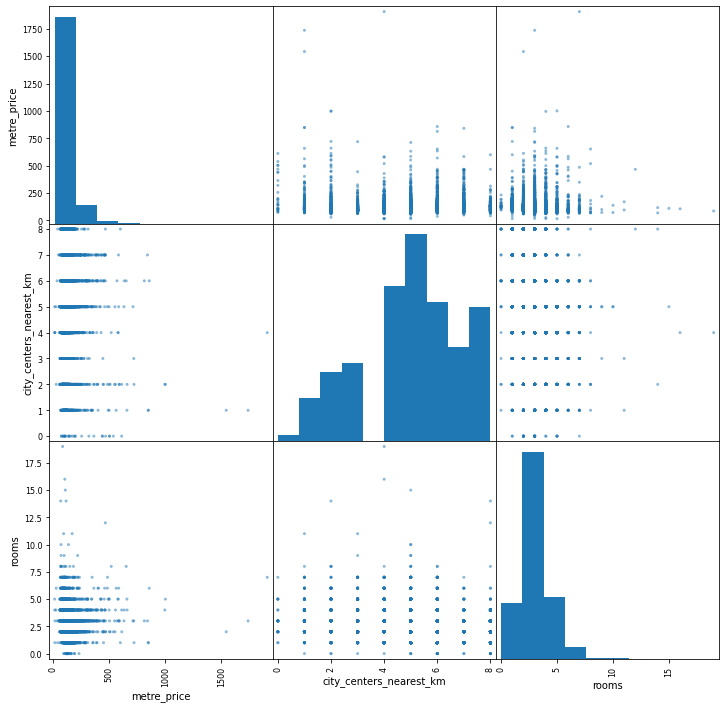

In [257]:
# выведем матрицу диаграмм рассеяния для области
data_filtered = data[['metre_price','city_centers_nearest_km','rooms']]
pd.plotting.scatter_matrix(spb_center_filtered, figsize=(12, 12)) 
plt.show

In [258]:
# построим корреляцию Пирсона для  параметров
data[['last_price','total_area','rooms','city_centers_nearest']].corr()

,last_price,total_area,rooms,city_centers_nearest
last_price,1.000000,0.653743,0.363421,-0.206887
total_area,0.653743,1.000000,0.758745,-0.231904
rooms,0.363421,0.758745,1.000000,-0.184322
city_centers_nearest,-0.206887,-0.231904,-0.184322,1.000000


<div class="alert alert-info"> <b></b> 
    
    Добавлена корреляция Пирсона параметров.
    
    Положительные коэффициенты :
    total_area и last_price 0,65 , total_area и rooms 0,75 отражают прямую зависимость близкую к линейной;
    
    обратная зависимость : last_price и city_centers_nearest -0.206887 , total_area и city_centers_nearest -0.231904 ,rooms и city_centers_nearest -0.184322 слабая .

</div>
    

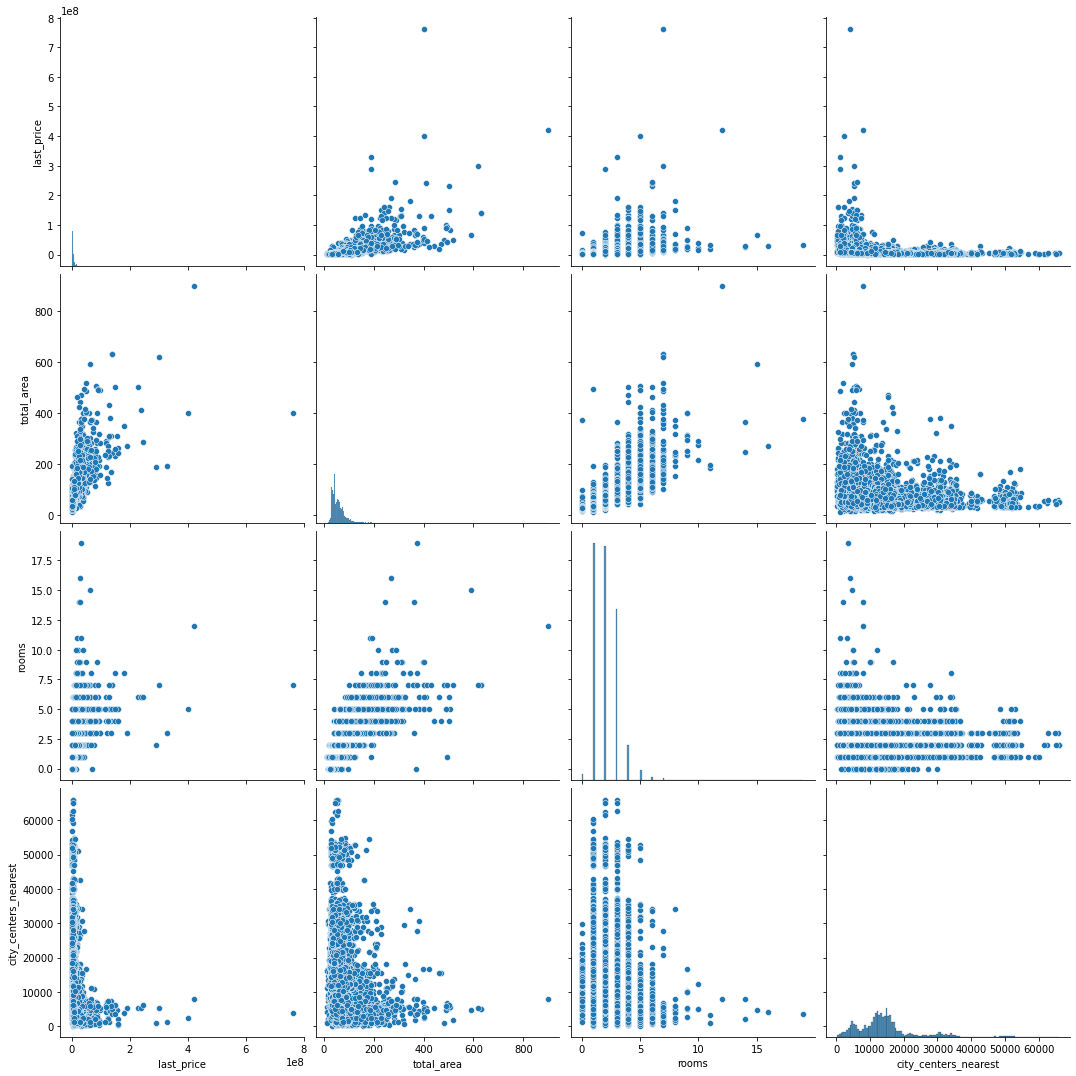

In [259]:
# для визуализации параметров используем метод sns.pairplot для отображения корреляции всех графиков
data_corr =  data[['last_price','total_area','rooms','city_centers_nearest']]

sns.pairplot(data_corr,height=3.8)

# Вывод. 
Задача — установить параметры для определения рыночной стоимости объектов недвижимости 

В результате анализа выявлены основные параметры, которые помогут определить рыночную стоимость объектов недвижимости:

-1. Местоположение объекта.

Анализ показал, что *самые высокие* цены в центре города ,*более высокие* на расстоянии от 4 до 10 км. от центра города.

-2. Количество комнат.

Анализ показал, что  с увеличением количества комнат увеличивается и цена квартир как в центре города таки по области.

-3. Тип этажа.

Анализ показал, что квартиры на первых этажах имеют самую низкую цену метра жилья, последние этажи ценятся выше: от 7% по области до 13% в центре города. Наибольшую цену объявляют по квартирам находящимся на других этажах.
    

Особый вывод: 

имеет смысл в форме для объявлений сделать настройку проверки соответствия площадей: общей, жилой и площади кухни, т.к. при анализе обнаружились ошибки и несоответствия между этими показатнлями.

<div class="alert alert-info"> <b></b> 
В процессе исследования были рассмотрены  данные по г.Санкт-Петербург и соседним населённым пунктам за несколько лет. Данные были приведены  в состоянию пригодному для анализа: проведена замена типов данных ряда параметров, заполнены недостающие данные средними и другими значениями , проведена работа над выбосами в данных. В результате получены пригодные к анализу
данные.С их помощью  удалось выявить основные параметры, которые влияют на среднюю рыночную стоимость объектов недвижимости в регионе.В процессе работы проводился сравнительный анализ показателей квартир в центре г.Санкт-Перербург и в ближайших населённых пунктов. Данные визуализованы с помощью графиков, диаграмм и гистограмм. 

В результате анализа выявлены основные параметры, которые помогут определить рыночную стоимость объектов недвижимости:

-1. Местоположение объекта.

Анализ показал, что *самые высокие* цены в центре города ,*более высокие* на расстоянии от 4 до 10 км. от центра города.

-2. Количество комнат.

Анализ показал, что  с увеличением количества комнат увеличивается и цена квартир как в центре города таки по области.

-3. Тип этажа.

Анализ показал, что квартиры на первых этажах имеют самую низкую цену метра жилья, последние этажи ценятся выше: от 7% по области до 13% в центре города. Наибольшую цену объявляют по квартирам находящимся на других этажах.

Средняя стоимость квартир в общей базе составила 6 541 127 руб., в центре г.Санкт-Перербург - 8 960 000 руб.
</div>